<a href="https://colab.research.google.com/github/Sovarna/Phyton-Assignement/blob/main/Phyton_2nd_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-25 07:15:00--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-25 07:15:02--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  50.4MB/s    in 23s     

2023-05-25 07:15:25 (34.

In [ ]:
# sqlite 3 library is used to establish connection with the database and execute data
import sqlite3
# Pandas library is used for the analysis of data and processing.
import pandas as pd


In [ ]:
# This function is done to connect with the database
connect = sqlite3.connect("enron.db")

In [ ]:
# Cursor is used to retrive data and run queries using sql.
cur = connect.cursor()

In [ ]:
# SQl query used to extract a specific data from the database.
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
# The cursor is used to generate the sql statement.
cur.execute(sql)

# Fetching the rows of the query
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
# Executing the result from the sql query displaying name from the table dataframe 
table_df = pd.read_sql_query(sql,connect)
table_df

,name
0,employeelist
1,message
2,recipientinfo
3,referenceinfo


In [ ]:
# The Function PRAGMA is use to extract the schema database of employeelist from the table
sql2 = """
PRAGMA table_info('employeelist');
"""
# Generate employeelist from sql2 statement
cur.execute(sql2)

#Fetching the rows of sql2 query
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
#Executing the result from the sql2 query displaying employeelist dataframe from the table_info 
employee_df = pd.read_sql_query(sql2,connect)
employee_df

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


In [ ]:
# SQl query used to extract all employeelist data from the database with a limit of 11 information
SQL = """
SELECT * From Employeelist
LIMIT 11;

"""
# Generate employeelist sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying employeelist into a dataframe
employee_df = pd.read_sql_query(SQL,connect)
employee_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
5,6,Mark,Taylor,mark.e.taylor@enron.com,mark.taylor@enron.com,e.taylor@enron.com,,taylor-m,Employee
6,7,Theresa,Staab,theresa.staab@enron.com,theresa_staab@enron.com,tstaab@enron.com,,staab-t,Employee
7,8,Susan,Pereira,susan.w.pereira@enron.com,w..pereira@enron.com,susan.peireira@enron.com,,pereira-s,Employee
8,9,Stephanie,Panus,stephanie.panus@enron.com,,,,panus-s,Employee
9,10,Phillip,Allen,phillip.k.ellen@enron.com,phillip.allen@enron.com,k..allen@enron.com,,allen-p,Manager


In [ ]:
# To extract the database schema of message from table_info.
sql3 = """
PRAGMA table_info('message');
"""
# Generate message from sql3 statement
cur.execute(sql3)

#Fetching the rows of sql3 query
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
#Executing the result from the sql3 query displaying message dataframe from the table_info 
message_df = pd.read_sql_query(sql3,connect)
message_df

,cid,name,type,notnull,dflt_value,pk
0,0,mid,INTEGER,1,'0',1
1,1,sender,VARCHAR(127),1,'',0
2,2,date,DATETIME,0,None,0
3,3,message_id,VARCHAR(127),0,None,0
4,4,subject,TEXT,0,None,0
5,5,body,TEXT,0,None,0
6,6,folder,VARCHAR(127),1,'',0


In [ ]:
# SQl query used to extract all message data from the database with a limit of 11 information 
SQL = """
SELECT * FROM message 
Limit 11;
"""
# Generate message sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying message into a dataframe
message_df = pd.read_sql_query(SQL,connect)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
5,57,foothi19@idt.net,2000-08-25 02:09:00,<31680362.1075863730221.JavaMail.evans@thyme>,WPTF Friday Credo Veritas Burrito,"THE FRIDAY BURRITO""...more fun than a fortune ...",Robert_Badeer_Aug2000Notes FoldersNotes inbox
6,58,enron.announcements@enron.com,2000-06-21 11:46:00,<25532011.1075863606453.JavaMail.evans@thyme>,SAP ID - Here it is!!!!!,The following SAP ID and Password allows you t...,Robert_Badeer_Aug2000Notes FoldersNotes inbox
7,59,christopher.calger@enron.com,2000-06-27 08:58:00,<23318125.1075863606431.JavaMail.evans@thyme>,Set of Graphs,---------------------- Forwarded by Christophe...,Robert_Badeer_Aug2000Notes FoldersNotes inbox
8,60,christian.yoder@enron.com,2000-07-25 08:14:00,<25889429.1075863606409.JavaMail.evans@thyme>,Block Forward Financial Trades,Legal has been assessing the risks of doing bl...,Robert_Badeer_Aug2000Notes FoldersNotes inbox
9,61,carla.hoffman@enron.com,2000-07-27 10:27:00,<9486701.1075863606387.JavaMail.evans@thyme>,Block forwards,Positions have been reduced as follows for Aug...,Robert_Badeer_Aug2000Notes FoldersNotes inbox


In [ ]:
# To extract the database schema of Recipient from table_info.
sql4 = """
PRAGMA table_info('Recipientinfo');
"""
# Generate Recipientinfo from sql4 statement
cur.execute(sql4)

#Fetching the rows of sql4 query
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
#Executing the result from the sql4 query displaying Recipientinfo dataframe from the table_info 
Recipientinfo_df = pd.read_sql_query(sql4,connect)
Recipientinfo_df

,cid,name,type,notnull,dflt_value,pk
0,0,rid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,rtype,TEXT,0,None,0
3,3,rvalue,VARCHAR(127),0,None,0
4,4,dater,DATETIME,0,None,0


In [ ]:
# SQl query used to extract all Recipientinfo data from the database with a limit of 11 information 
SQL = """
SELECT * FROM Recipientinfo
limit 11;
"""
# Generate Recipientinfo sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying Recipientinfo into a  dataframe
Recipientinfo_df = pd.read_sql_query(SQL,connect)
Recipientinfo_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
5,72,56,TO,ec.communications@enron.com,None
6,73,57,TO,charlotte@wptf.org,None
7,74,58,TO,sap.mailout@enron.com,None
8,75,59,TO,robert.badeer@enron.com,None
9,76,60,TO,tim.belden@enron.com,None


In [ ]:
# To extract the database schema of Referenceinfo from table_info.
sql5 = """
PRAGMA table_info('Referenceinfo');
"""
# Generate Referenceinfo from sql5 statement
cur.execute(sql5)

#Fetching the rows of sql5 query
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [ ]:
#Executing the result from the sql5 query displaying Referenceinfo dataframe from the table_info 
Referenceinfo_df = pd.read_sql_query(sql5,connect)
Referenceinfo_df

,cid,name,type,notnull,dflt_value,pk
0,0,rfid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,reference,TEXT,0,None,0


In [ ]:
# SQl query used to extract all Recipientinfo data from the database with a limit of 11 information 
SQL = """
SELECT * FROM Referenceinfo
Limit 11;
"""

# Generate Referenceinfo sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying Referenceinfo into a dataframe
Referenceinfo_df = pd.read_sql_query(SQL,connect)
Referenceinfo_df

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
5,15,846,"From: \tRangel, Ina Sent:\tThursday, March 07..."
6,16,847,"From: \tGrigsby, Mike Sent:\tFriday, March 08..."
7,17,848,"From: \tGrigsby, Mike Sent:\tFriday, March 08..."
8,18,849,"From: \tRangel, Ina Sent:\tThursday, March 07..."
9,19,851,"From: \tHyatt, Kevin Sent:\tWednesday, July 2..."


### EMAIL TRAFFIC OVER Time
Count of volume send over time

In [ ]:
# Matplotlib is a library used for plotting graphs and visualisation 
import matplotlib.pyplot as plt

# Seaborn library is used in accordance to the matplotlib to have more appealing diagrams.
import seaborn as sns

In [ ]:
# SQl query used to extract date from the message dataframe.
SQL = """
SELECT date FROM message
"""
# Generate the sql query statement by reading and displaying date form the message dataframe
message_df = pd.read_sql_query(SQL,connect)
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [ ]:
# SQL query to strftime (to formate date) count and group the number of emails per day from the message dataframe.
SQL = """

SELECT strftime('%Y-%M-%d',date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
# Executing the SQL query
cur.execute(SQL)

# Executing sql query by displaying date and count of emails per day into a dataframe
Daily_message_df = pd.read_sql_query(SQL, connect)
Daily_message_df


,date,count
0,0001-10-30,2
1,0001-40-18,1
2,0001-11-24,1
3,0001-30-01,1
4,0001-06-06,1
...,...,...
194082,2020-53-29,1
194083,2043-34-28,1
194084,2044-46-02,1
194085,2044-59-04,1


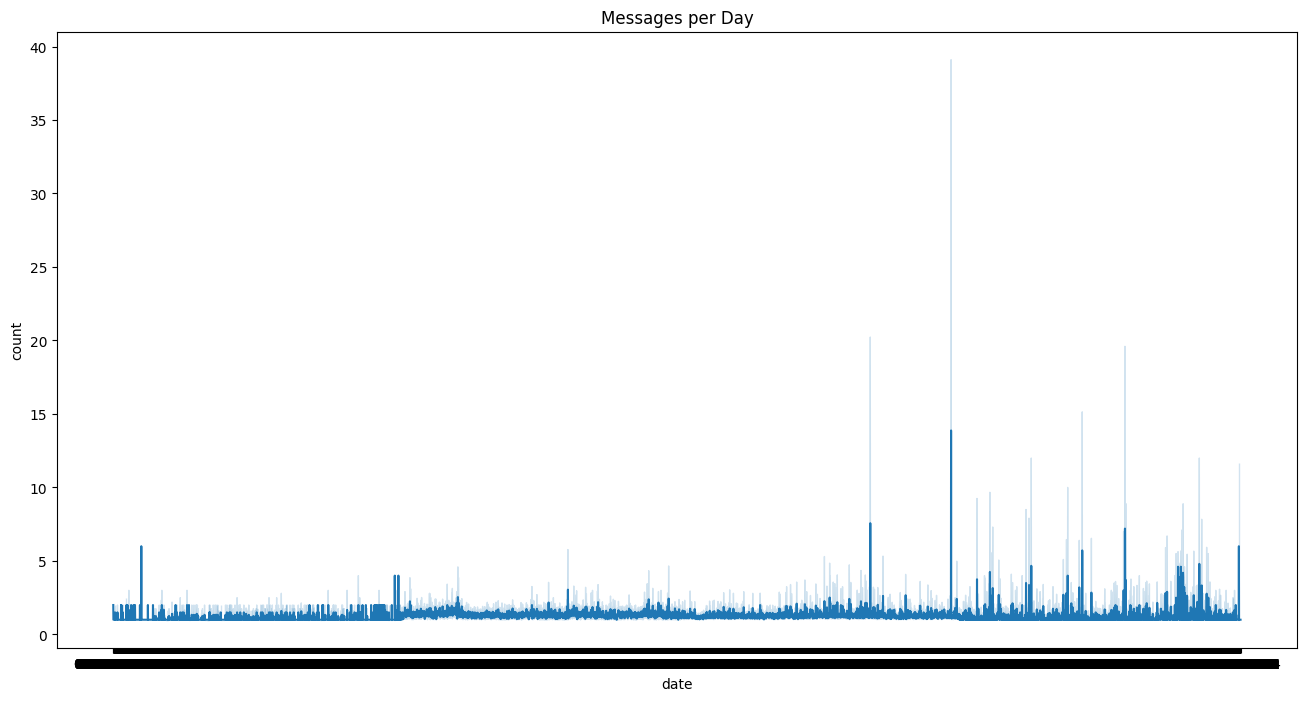

In [ ]:
# Plotting the line graph for emails per day using matplotlib and seaborn
# the x-axis = date and the y-axis = count
# The line graph data is extracted from Daily_message_df
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x= 'date', y= 'count',data= Daily_message_df)
plt.title('Messages per Day')
plt.show()

In [ ]:
# SQL query to strftime (to formate date) count and group the number of emails per week from the message dataframe.
SQL = """

SELECT strftime('%Y-%M-%w', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""

# Executing the SQL query
cur.execute(SQL)

# Executing sql query by displaying date and count of emails per week into a dataframe
Weekly_message_df = pd.read_sql_query(SQL, connect)
Weekly_message_df

,date,count
0,0001-10-3,2
1,0001-40-1,1
2,0001-11-2,1
3,0001-30-3,1
4,0001-06-1,1
...,...,...
194082,2020-53-2,1
194083,2043-34-1,1
194084,2044-46-6,1
194085,2044-59-1,1


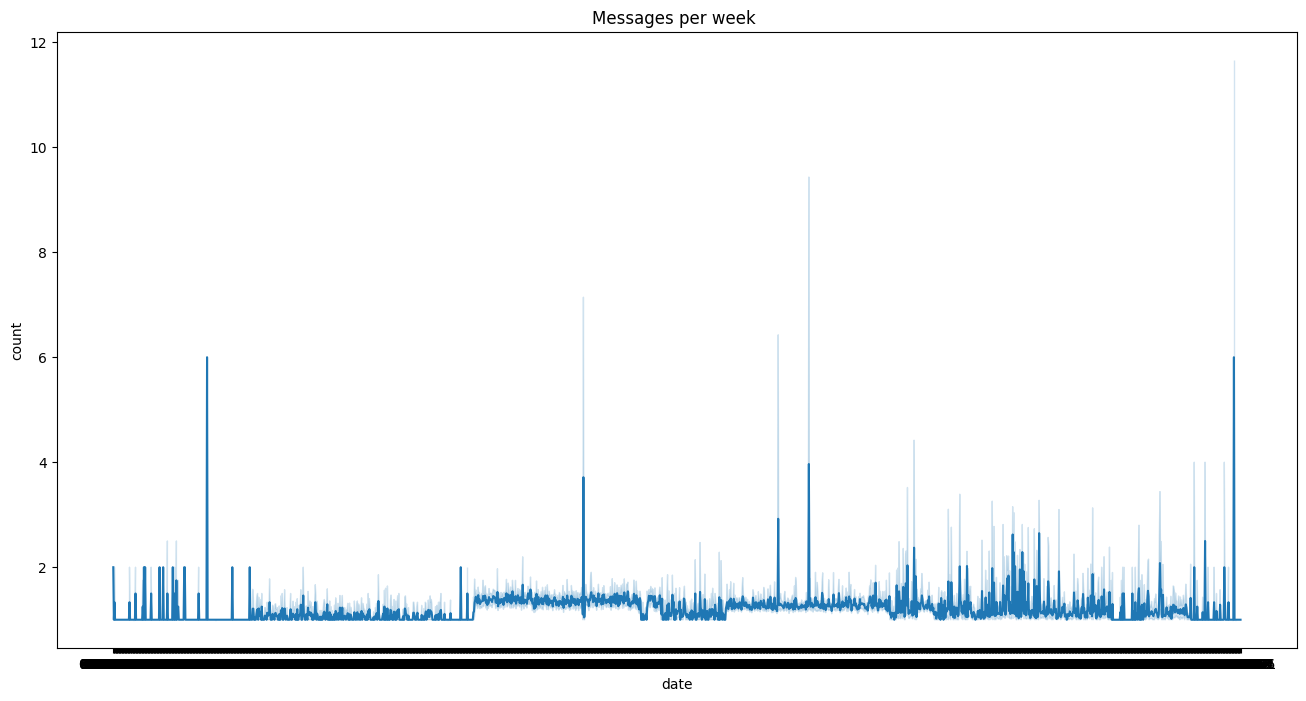

In [ ]:
# Plotting the line graph for emails per day using matplotlib and seaborn
# The x-axis = date, the y-axis = count and title = Messages per week 
# The line graph data is extracted from weekly_message_df
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x= 'date', y= 'count',data = Weekly_message_df)
plt.title('Messages per week ')
plt.show()

In [ ]:
# SQL query to strftime (to formate date) count and group the number of emails per month from the message dataframe.
SQL = """

SELECT strftime('%Y-%M', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
# Executing the SQL query
cur.execute(SQL)

# Executing sql query by displaying date and count of emails per month into a dataframe
Monthly_message_df = pd.read_sql_query(SQL, connect)
Monthly_message_df

,date,count
0,0001-10,2
1,0001-40,1
2,0001-11,1
3,0001-30,1
4,0001-06,1
...,...,...
194082,2020-53,1
194083,2043-34,1
194084,2044-46,1
194085,2044-59,1


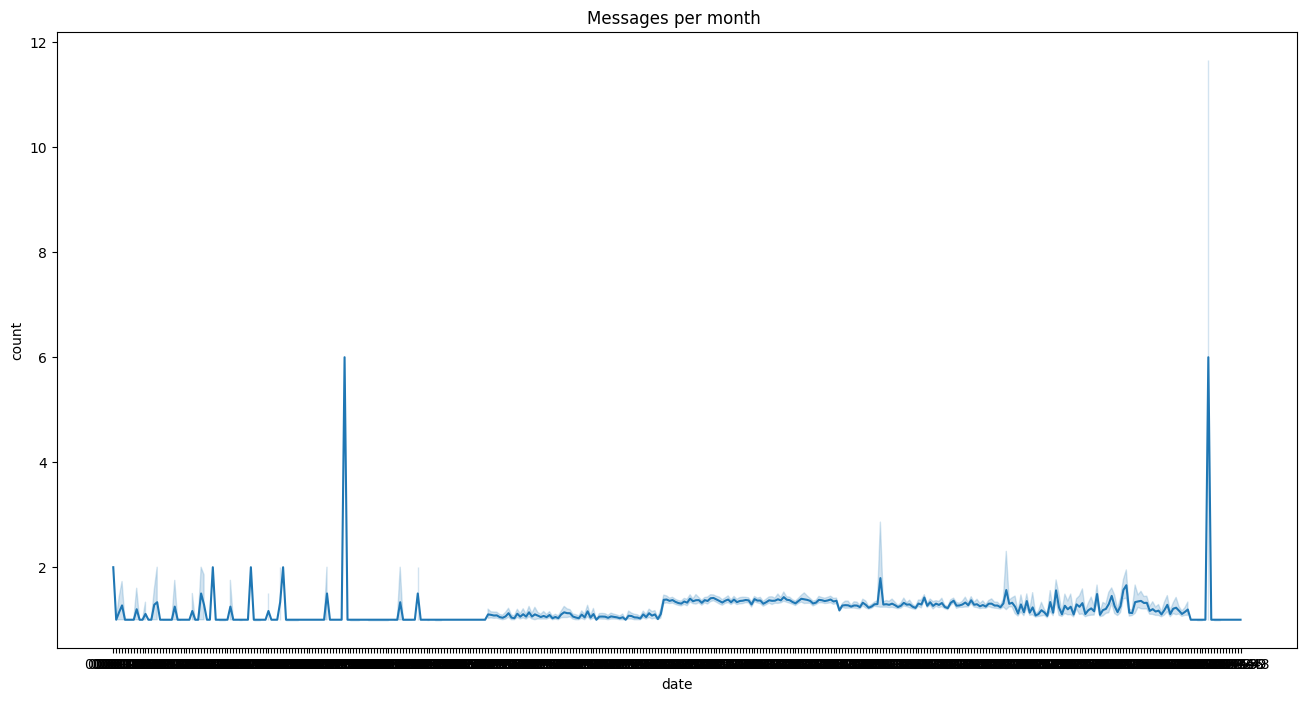

In [43]:
# Plotting the line graph for emails per month using matplotlib and seaborn
# The x-axis = date, the y-axis = count and title = Messages per month 
# The line graph data is extracted from Monthly_message_df
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x= 'date', y= 'count',data= Monthly_message_df)
plt.title('Messages per month ')
plt.show()

### Top Senders and Recepients

# Top Sender

In [52]:
# SQl query used to extract, count, group and order frequent sender data from the message dataframe with a limit of 11 information 
SQL = """

SELECT sender, COUNT(*) As Num_Sender FROM message
GROUP BY sender
ORDER BY COUNT(*) DESC
LIMIT 11
"""
# Executing the SQL query
cur.execute(SQL)

In [53]:
# Executing sql query by displaying frequent email sender form the dataframe
F_Esenders_df = pd.read_sql(SQL,connect)
F_Esenders_df 

,sender,Num_Sender
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


## Bar Chart for Top senders 

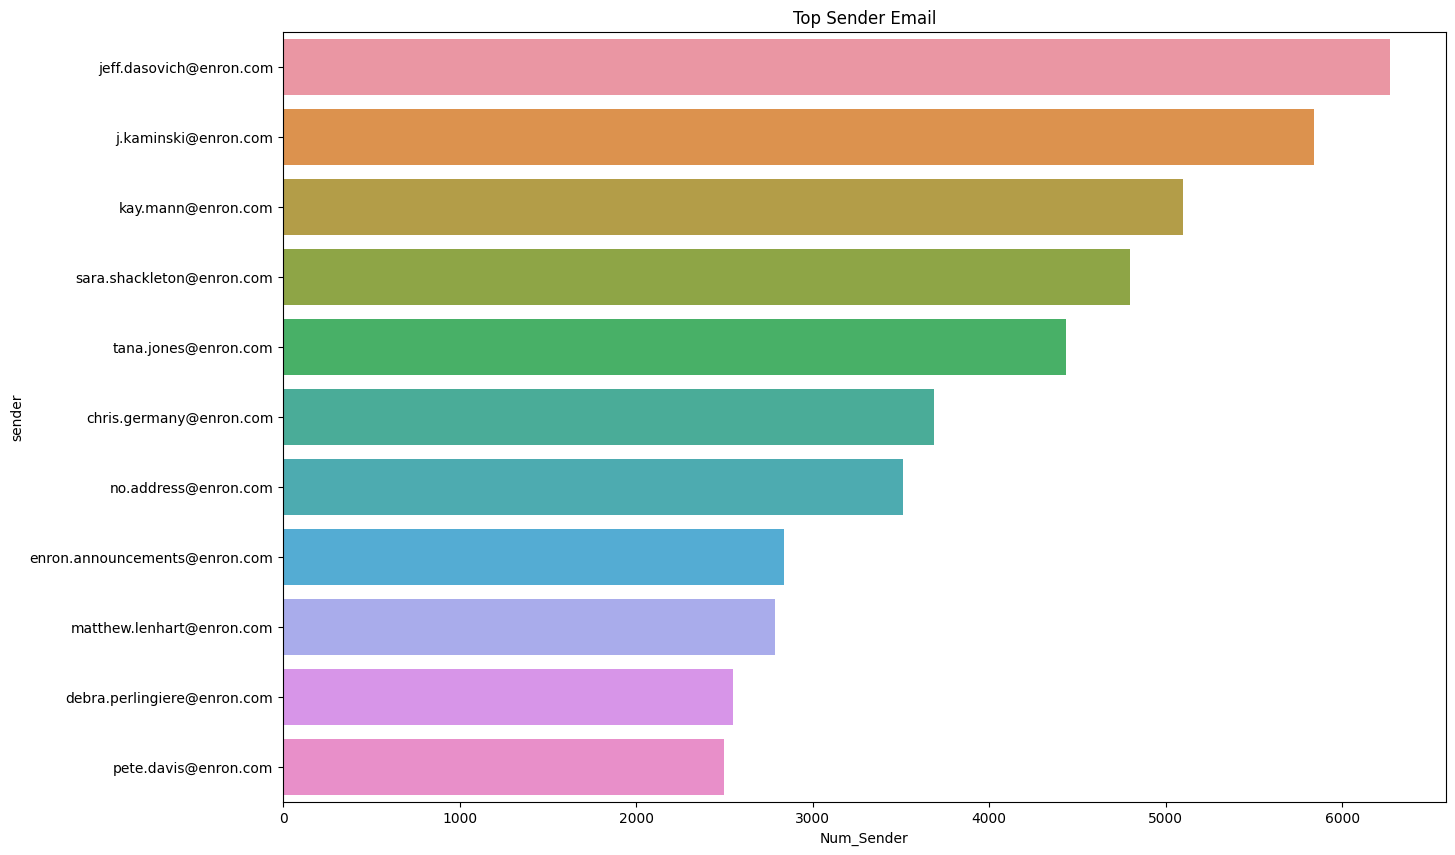

In [54]:
# Plotting bar chart for top sender using matplotlib and seaborn
# The x-axis = Num_sender, the y-axis = sender and title = Top sender Email 
# the bar chart data is extracted from F_Esenders_df
fig = plt.subplots(figsize=(15,10))
sns.barplot(x= 'Num_Sender', y= 'sender',data= F_Esenders_df)
plt.title('Top Sender Email')
plt.show()

# Top Recipients

In [49]:
# SQl query used to extract, count, group and order frequent recipient data from the Recipientinfo dataframe with a limit of 11 information 
SQL = """

SELECT rvalue As Recipient_E, COUNT(*) As Num_Recipient FROM Recipientinfo
GROUP BY Recipient_E
ORDER BY Num_Recipient  DESC
Limit 11;

"""
# Executing the SQL query
cur.execute(SQL)

In [50]:
# Executing sql query by displaying frequent recipient email form the dataframe
F_RecipientE_df = pd.read_sql(SQL,connect)
F_RecipientE_df

,Recipient_E,Num_Recipient
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


### Bar Chart for Recipients

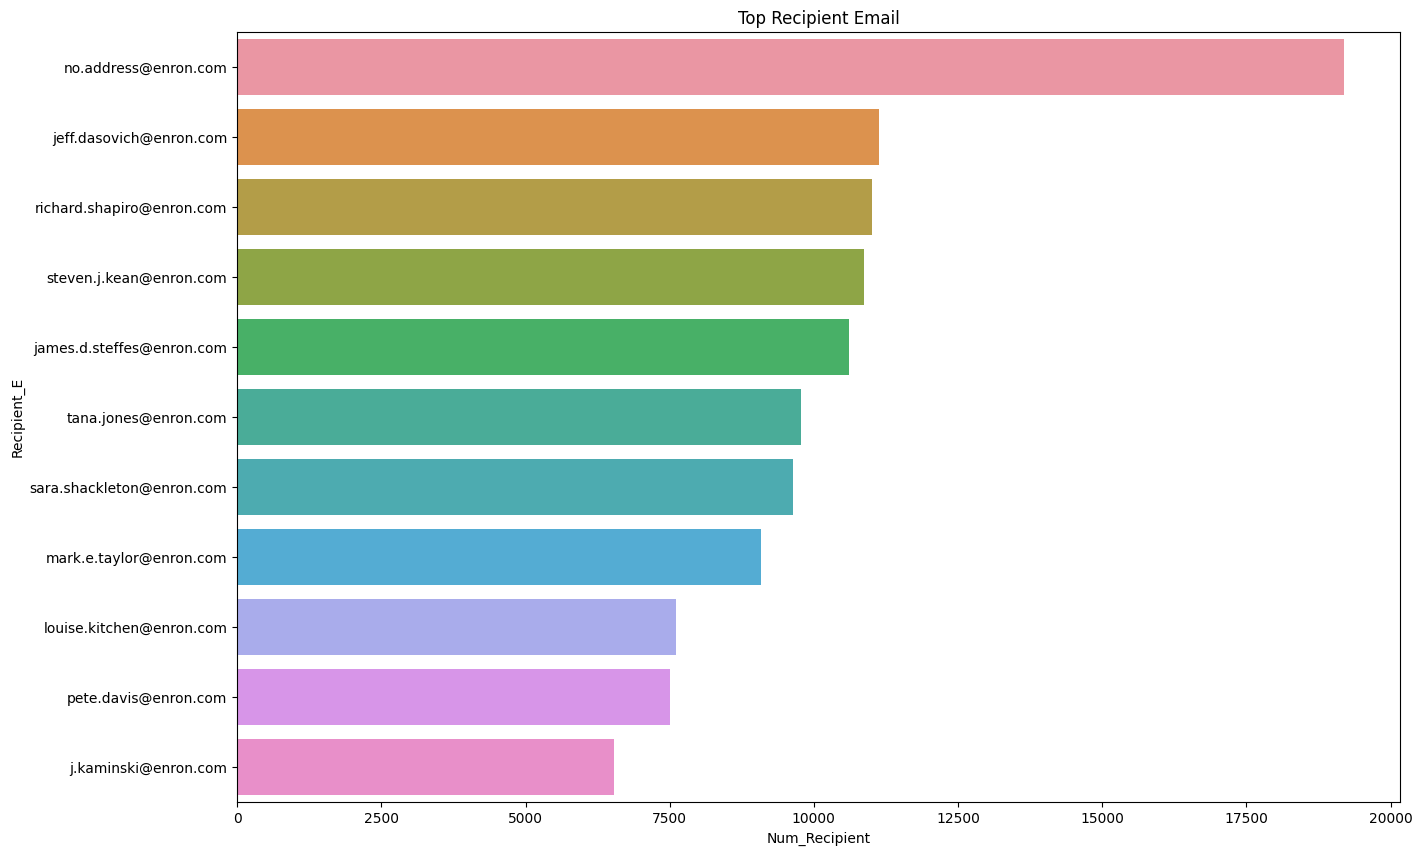

In [51]:
# Plotting bar chart for Top Recipient Email using matplotlib and seaborn
# The x-axis = Num_Recipient, the y-axis = Recipient_E and title = Top Recipient Email 
# the bar chart data is extracted from F_RecipientE_df
fig = plt.subplots(figsize=(15,10))
sns.barplot(x= 'Num_Recipient', y= 'Recipient_E',data= F_RecipientE_df)
plt.title('Top Recipient Email')
plt.show()

## Email Distribution By Recipient Type

In [ ]:
# SQL query to extract, count and group the email distribution of by Recipient type from the Recipientinfo dataframe
SQL = """

SELECT rtype, COUNT (*) AS RecipientType_num FROM Recipientinfo
GROUP BY rtype

"""

# Executing the SQL query
cur.execute(SQL)

In [ ]:
# Executing sql query by displaying rtype email distribution form the Recipientinfo.
rtype_dataframe = pd.read_sql(SQL,connect)
rtype_dataframe

,rtype,RecipientType_num
0,BCC,253713
1,CC,253735
2,TO,1556994


## The Proportion of rtype

In [ ]:
# This function is for the calculation of the proportion of rtype
P_Rtype = rtype_dataframe['RecipientType_num']/rtype_dataframe['RecipientType_num'].sum()

### Pie Chart for the Prorportion of Email by Each rtype

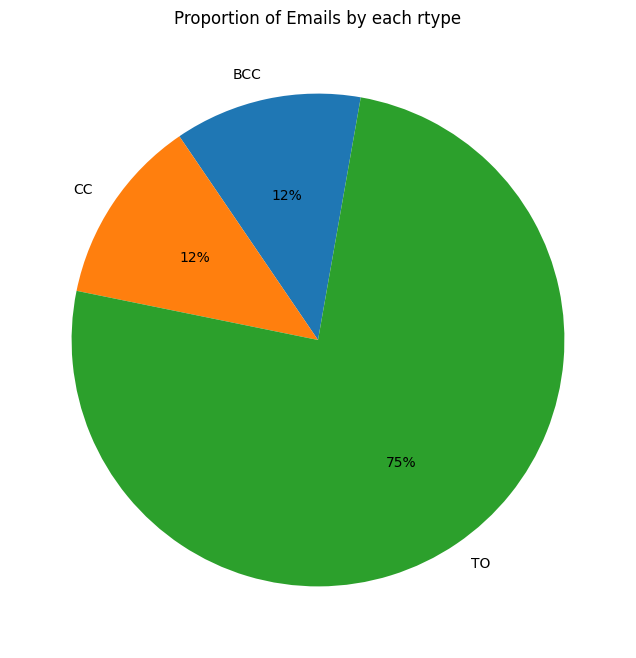

In [ ]:
# Plotting pie chart for Proportion of emails by each rtype using matplotlib and seaborn
# The pie data is extracted from rtype_dataframe 
figure = plt.subplots(figsize=(8,8))
plt.pie(P_Rtype, labels = rtype_dataframe['rtype'], autopct='%.0f%%', startangle=80 )
plt.title('Proportion of Emails by each rtype')
plt.show()

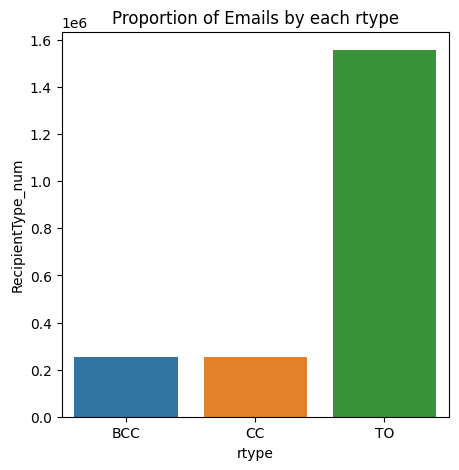

In [ ]:
# Plotting stacked bar for Proportion of emails by each rtype using matplotlib and seaborn
# The stacked bar data is extracted from rtype_dataframe
fig = plt.subplots(figsize=(5,5))
sns.barplot(x= 'rtype', y= 'RecipientType_num', data= rtype_dataframe)
plt.title('Proportion of Emails by each rtype')
plt.show()